# LLM from Scratch with PyTorch 

- It all started with the landmark [Attention is All You Need](https://arxiv.org/abs/1706.03762). 
- The Transformer architecture was proposed, which soon powered the very first GPT--GPT-1 (Generative Pretrained Transformer) in 2018. 
- We will break apart the Transformer architecture and understand it piece by piece. 

## Tokenizer 
- Any text we provide is broken down by the LLM's tokenizer into smaller units called tokens, which can range from a single character to an entire word. 
- Consider the text: "Hold my math!" Depending on the model's design, tokens can be words, subwords, or even characters.
    - Word-level tokenization: ["Hold", "my", "math", "!"]
    - Subword-level tokenization: ["Hold", "my", "ma", "th", "!"]
    - Character-level tokenization: ["H", "o", "l", "d", " ", "m", "y", " ", "m", "a", "t", "h", "!"]

## Next Token Predictors
- Large language models are, by basic definition, next-token predictors. 
- Given the input tokens, the model learns to analyze and predict the probability of what the next token can be. 
- They handle only a fixed number of tokens at once, generating one token per step. 
- Long replies you see, come from repeating this process efficiently. 
- This is achieved by sliding the input window forward after each prediction repeatedly and stopping at an eos token or a certain length limit. 

- In fact, you might be thinking that for LLM API calls, you write the code in this way. 

In [ ]:
messages = [
    {
        "role": "system",
        "content": "You are a creative storyteller."
    },
    {
        "role": "user",
        "content": "Write a creative story"
    },
]

- But after the library processes this, the inout that goes to the large language model will be different. 

In [1]:
"""
<|im_start|>system
You are a creative storyteller.
<|im_end|>
<|im_start|>user
Write a creative story
<|im_end|>
<|im_start|>assistant
"""

'\n<|im_start|>system\nYou are a creative storyteller.\n<|im_end|>\n<|im_start|>user\nWrite a creative story\n<|im_end|>\n<|im_start|>assistant\n'

- After pretraining, the large language model is fine-tuned on instructions to make it usable for human interactions. 
- This is called instruction tuning. 
- Otherwise, the LLM will remain as a simple text generator. 
- The above format is how input is passed to instruction-tuned models, although the tags like <|im_start|>user may differ for some of them. 

## Attention is All You Need 
- So how do LLMs decide what to generate? 
- It has the freedom to generate anything random. But how to make it generate output that makes sense? 
- For that, neural networks need to learn and use context from not only the last token but also from other parts of the input sentence. 
- Consider an example input, The cat chased the 
    - If the model only looked at the last token ("the"), it might predict almost anything: "banana", "man", "moon" etc. 
    - But if it uses the full context ("The", "cat", "chased", "the"), it knows "mouse" is far more likely than "moon" or "banana". 
- In the early days of sequence modeling, Recurrent Neural Networks (RNNs) were the go-to choice for handling text. 
- They processed words one at a time in sequence, passing a "hidden state" forward so each step carried some memory of the past. 
- This worked for short dependencies, but important information from earlier words often faded as the sequence grew longer. 

### Long Short-Term Memory (LSTM): 
- Introduced in 1997, improved on this by using special gating mechanisms, namely the input gate, forget gate, and output gate to control the flow of information. 
- These gates decide which parts of the current input and past memory to keep, update, or discard, enabling the network to maintain relevant information over much longer sequences. 
- 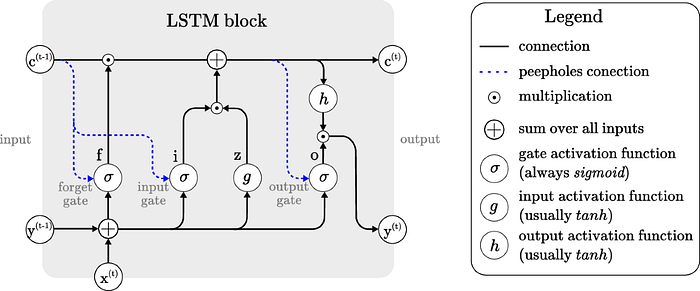

- The attention mechanism, introduced in 2017, in Attention is All You Need, addressed this limitation. 
- Instead of relying on sequential processing, attention connects every word in the input directly to every other word, computing weights that determine how much each token should influence the prediction. 
- This allows the model to capture long-range dependencies efficiently and in parallel. 

#### Attention Mechanism Work: 
- The goal is to measure how much each token in a sentence relates to, or influences, every other token. 
- The resulting measure for a pair of tokens is called the attention score. 
- Collecting these scores for all token pairs produces the attention matrix. For this, we need three components for each token: 
    1. Query vector:
        - it represents what this token is looking for in other tokens. 
        - It is calculated by the cross product of the input embedding vector and a trainable query matrix 
    2. Key vector: 
        - It represents what this token offers as searchable information. 
        - It is calculated by the cross product of the input embedding vector and a trainable key matrix. 
    3. Value vector: 
        - it contains the actual information content that will be passed along if the token is attended to. 
        - It is calculated by the cross product of the input embedding vector and a trainable value matrix. 
- 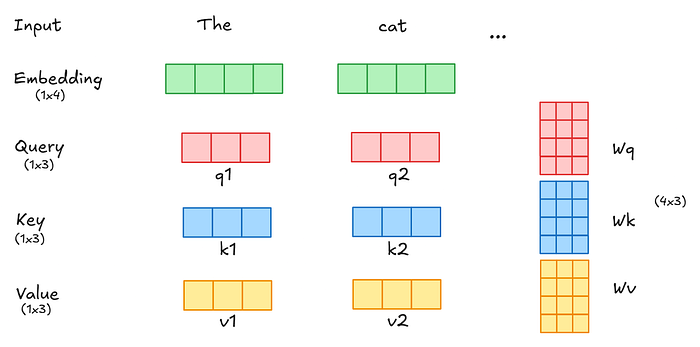

- The score of a token is calculated by taking the dot product of the query vector with the key vector of the respective word we are scoring. 
- Each score is normalized using a softmax activation and divided by the square root of the embedding dimension to get the attention weight. 
- Finally, multiply each value vector by its corresponding attention weight to get the context vector. 
- 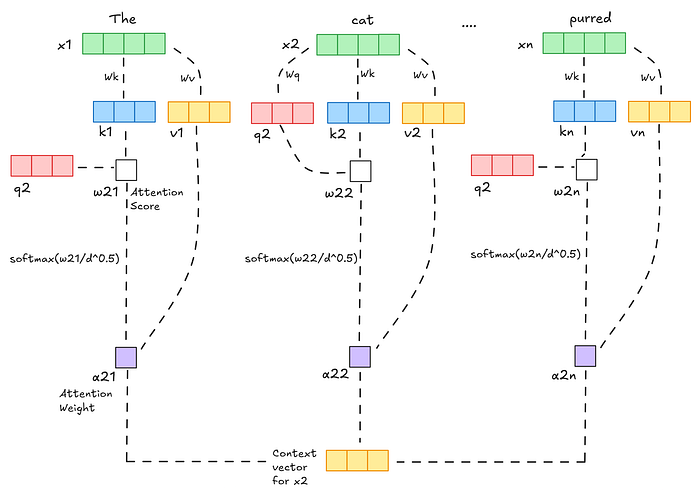

- These context vectors are combined as a matrix that we refer to as the attention matrix. 
- 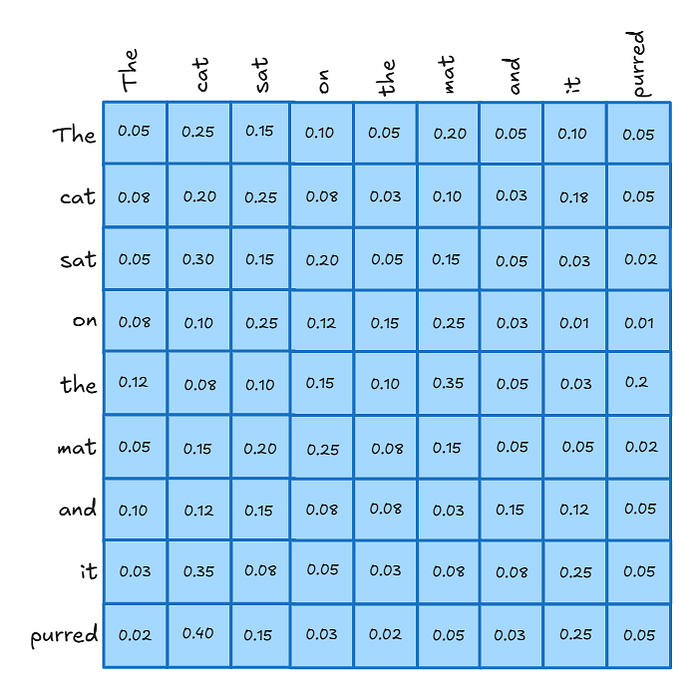

- In theory, the probability of a token being chosen as the next one should depend on the past tokens only and not on the future tokens, or else it doesn't make sense. 
- To implement this, we need to mask all the future values in the matrix during the training phase and adjust the row values so that they add up to one as earlier, because these values are probabilities. 
- This is called Causal Attention. 
- 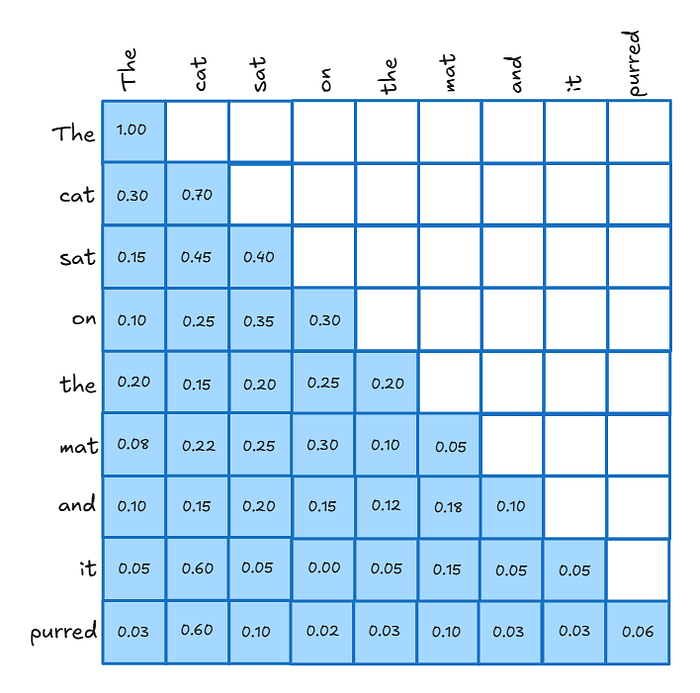

### Building the Transformer Architecture 
- 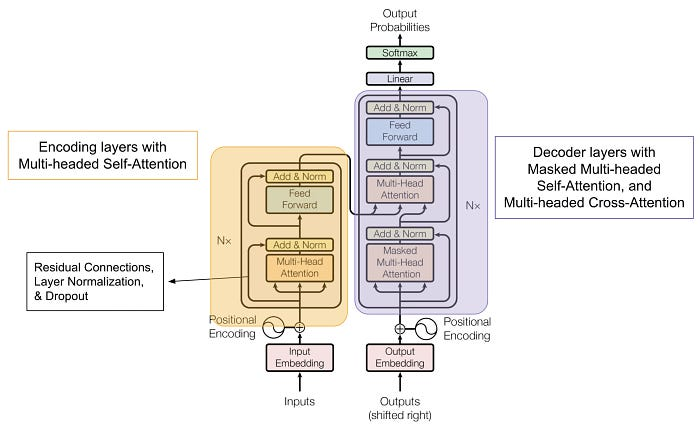
- A Tranformer is built from encoder and decoder blocks, each made up of the same key components: embeddings, positional encodings, self-attention, multi-head attention, and feed-forward layers. 
- At its core, think of it as a modular pipeline: 
    1. Input sequence text is broken into tokens. 
    2. Tokens are converted into numerical embeddings and tagged with positional encodings. 
    3. Self-attention lets every token "pay attention" to every other token or in simpler words the model figures out how each token relates to others. 
    4. Multi-head attention combines several self-attention layers and lets the model view those relationships from multiple angles. 
    5. A feed-forward network transformers the combined information into stronger features. 
- By stacking many such layers, the model learns increasingly rich representation of a language. 
- Each of the section below will peel apart one of these building blocks, and we will implement them step by step in PyTorch until we have a working Transformer from scratch. 
- We will focus on the GPT architecture, which is decoder-only. 
- 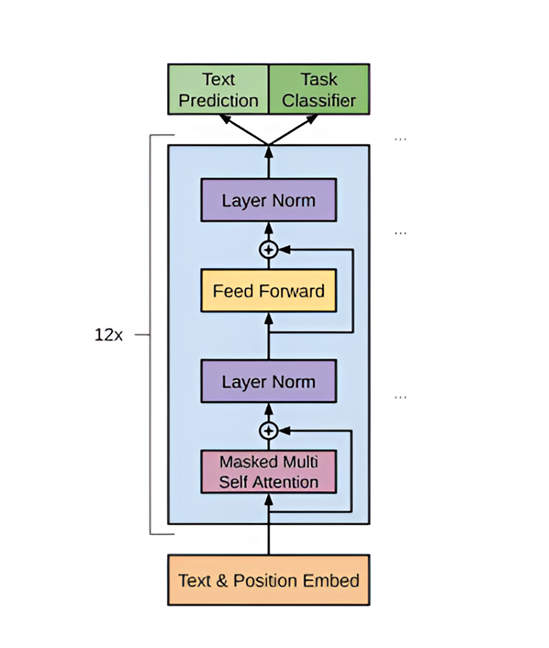